Task2 : Hybrid OOD Detection

In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp, shapiro, levene
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report


Data summary

In [541]:
# Load the CSV file
file_path = os.path.join(os.getcwd(), '../results/stage2/Task3/exp6/results-6-RealSR-indis-degradation.csv')  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Preview the first few rows
print(data.head())

       real_res  real_method1  real_PSNR   syn_res  syn_method1   syn_PSNR
0  1.105957e-02  3.253049e+01  20.117861  1.000000     0.364763  21.435759
1  8.907779e-28  4.027068e+26  21.083565  1.000000     0.294086  20.849812
2  7.129565e-27  4.749092e+25  21.585732  0.999997     0.304562  23.303940
3  1.314454e-13  2.733806e+12  20.319395  1.000000     0.319972  22.896101
4  0.000000e+00           inf  21.042841  1.000000     0.306958  21.507704


In [542]:
# Extract the cosine similarity values for real and synthetic images
psnr_real = data['real_PSNR'].dropna().values  
psnr_synthetic = data['syn_PSNR'].dropna().values  

# Calculate statistics for real images
mean_real = np.mean(psnr_real)
std_real = np.std(psnr_real)

# Calculate statistics for synthetic images
mean_syn = np.mean(psnr_synthetic)
std_syn = np.std(psnr_synthetic)

Histogram Visualization

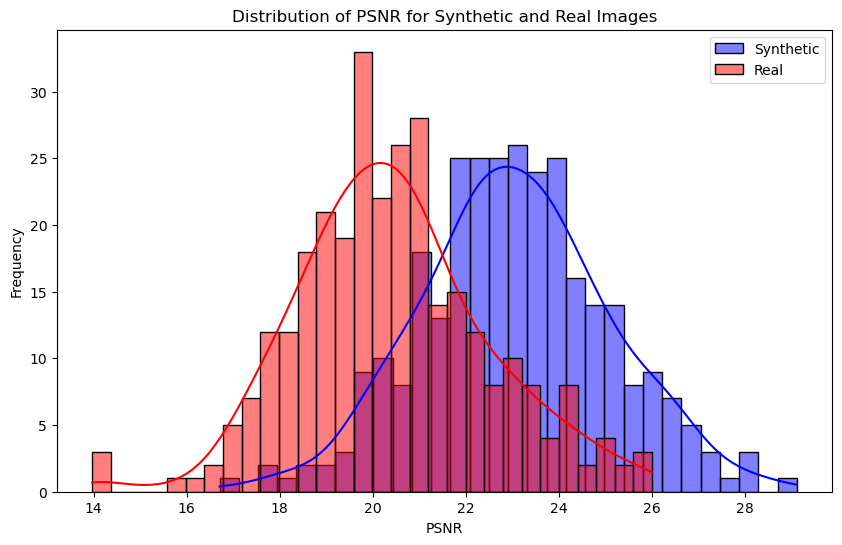

In [543]:
# Plot the distributions using Seaborn for better visualization
plt.figure(figsize=(10, 6))  # Define the figure size

# Plot histogram for synthetic images
sns.histplot(psnr_synthetic, color='blue', label='Synthetic', kde=True, bins=30)

# Plot histogram for real images
sns.histplot(psnr_real, color='red', label='Real', kde=True, bins=30)

# Set the plot labels and title
plt.xlabel('PSNR')
plt.ylabel('Frequency')
plt.title('Distribution of PSNR for Synthetic and Real Images')
plt.legend()

# Show the plot
plt.show()

There is a clear distinction between the PSNR distributions of Synthetic and Real images.

Statistical Analyse

1 - Descriptive Statistics

In [544]:
mean_syn, mean_real = np.mean(psnr_synthetic), np.mean(psnr_real)
std_syn, std_real = np.std(psnr_synthetic), np.std(psnr_real)
print(f"Synthetic PSNR - Mean: {mean_syn}, Std Dev: {std_syn}")
print(f"Real PSNR - Mean: {mean_real}, Std Dev: {std_real}")
print("--------------------------------------------------------------------------------")
# Analysis: Descriptive statistics help understand the central tendency and spread of each dataset, providing insight into whether the synthetic and real data have notable differences in their average values and variability.
# Expectation: If the mean and standard deviation of the two groups are significantly different, it suggests that the synthetic and real PSNR values may come from different distributions. A large difference in the mean indicates a potential distinction in average quality, while differences in standard deviation suggest variability differences.


Synthetic PSNR - Mean: 23.056337807973225, Std Dev: 2.0353420161497118
Real PSNR - Mean: 20.41440359433492, Std Dev: 2.0559331993277286
--------------------------------------------------------------------------------


2 - Boxplots Visuvalization

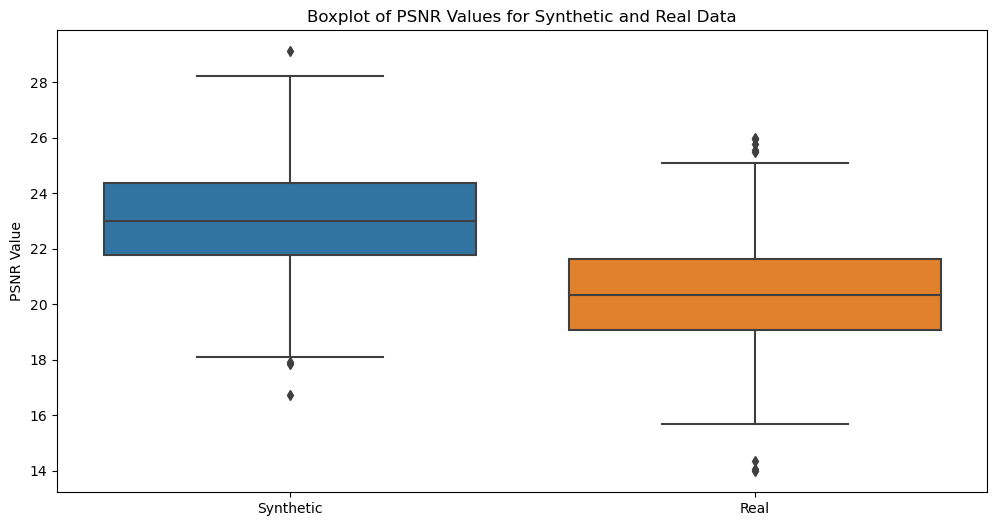

In [545]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[psnr_synthetic, psnr_real])
plt.xticks([0, 1], ['Synthetic', 'Real'])
plt.ylabel('PSNR Value')
plt.title('Boxplot of PSNR Values for Synthetic and Real Data')
plt.show()
# Analysis: Boxplots show the median, quartiles, and potential outliers in the data. This helps identify any differences in central tendency and spread, including any significant outliers.
# Expectation: If the median PSNR value for synthetic data is noticeably different from that of real data, and if the interquartile ranges do not overlap much, it implies that the groups are distinguishable.


3 - Hypothesis Testing

In [546]:
# Normality Test - Shapiro-Wilk
shapiro_syn = shapiro(psnr_synthetic)
shapiro_real = shapiro(psnr_real)
print(f"Shapiro Test for Synthetic PSNR - p-value: {shapiro_syn.pvalue}")
print(f"Shapiro Test for Real PSNR - p-value: {shapiro_real.pvalue}")
print("--------------------------------------------------------------------------------")
# Analysis: The Shapiro-Wilk test checks if the data is normally distributed.
# Expectation: If p-value > 0.05, you can assume normality. If either dataset is not normally distributed, you may need to use non-parametric tests for further analysis.

# Variance Homogeneity Test - Levene's Test
levene_test = levene(psnr_synthetic, psnr_real)
print(f"Levene's Test for Equal Variance - p-value: {levene_test.pvalue}")
print("--------------------------------------------------------------------------------")

# Analysis: Levene's test checks if the variances of the two datasets are equal.
# Expectation: If p-value > 0.05, it suggests that the variances are not significantly different, which means that the t-test can be used under the assumption of equal variance.

# If data is normal and variances are equal, use t-test
if shapiro_syn.pvalue > 0.05 and shapiro_real.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_stat, t_pvalue = ttest_ind(psnr_synthetic, psnr_real)
    print(f"T-Test - t-statistic: {t_stat}, p-value: {t_pvalue}")
    print("--------------------------------------------------------------------------------")

    # Analysis: The t-test checks if there is a significant difference in means between the two groups.
    # Expectation: If p-value < 0.05, it suggests that the means of the synthetic and real PSNR values are significantly different.
else:
    # If data is not normal, use Mann-Whitney U Test
    u_stat, u_pvalue = mannwhitneyu(psnr_synthetic, psnr_real)
    print(f"Mann-Whitney U Test - u-statistic: {u_stat}, p-value: {u_pvalue}")
    print("--------------------------------------------------------------------------------")

    # Analysis: The Mann-Whitney U test is used to compare medians between two groups when normality cannot be assumed.
    # Expectation: If p-value < 0.05, it suggests a significant difference between the medians of the two groups.

# Kolmogorov-Smirnov Test
ks_stat, ks_pvalue = ks_2samp(psnr_synthetic, psnr_real)
print(f"Kolmogorov-Smirnov Test - ks-statistic: {ks_stat}, p-value: {ks_pvalue}")
print("--------------------------------------------------------------------------------")

# Analysis: The K-S test checks if the two distributions are significantly different.
# Expectation: If p-value < 0.05, it suggests that the distributions of the synthetic and real PSNR values are significantly different, indicating that they likely come from different populations.


Shapiro Test for Synthetic PSNR - p-value: 0.9813668385133321
Shapiro Test for Real PSNR - p-value: 0.013678521731890462
--------------------------------------------------------------------------------
Levene's Test for Equal Variance - p-value: 0.8948727380590431
--------------------------------------------------------------------------------
Mann-Whitney U Test - u-statistic: 74050.0, p-value: 1.2887552637359909e-42
--------------------------------------------------------------------------------
Kolmogorov-Smirnov Test - ks-statistic: 0.5366666666666666, p-value: 6.3425628614729406e-40
--------------------------------------------------------------------------------


- Shapiro Test:

    Synthetic PSNR values are normally distributed.
    Real PSNR values do not follow a normal distribution.

- Levene's Test:

    there is no significant difference in variances between the PSNR values of Synthetic and Real images.

- Mann-Whitney U Test:

    The p-value (1.29e-42) is extremely small (close to zero), indicating that there is a significant difference between the PSNR values of Synthetic and Real images. 
    This test confirms that the difference we observed visually in the boxplot is indeed statistically significant, and the medians are not equal.

- Kolmogorov-Smirnov (KS) Test:

    The p-value (6.34e-4) is significantly less than 0.05, which suggests that there is a significant difference between the distributions of PSNR values for Synthetic and Real images.


4 - Effect Size (Cohen's d)

In [547]:
# Step 4: Effect Size (Cohen's d)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.std(x, ddof=1) ** 2 + (ny - 1) * np.std(y, ddof=1) ** 2) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(psnr_synthetic, psnr_real)
print(f"Cohen's d: {d}")
print("--------------------------------------------------------------------------------")

# Analysis: Cohen's d measures the effect size, indicating the magnitude of the difference between the two groups.
# Expectation: A larger Cohen's d (e.g., > 0.8) suggests a strong difference between synthetic and real PSNR, while smaller values indicate a less substantial distinction.


Cohen's d: 1.28932607616807
--------------------------------------------------------------------------------


A Cohen's d of 1.289 means that the mean PSNR of Synthetic images is about 1.289 standard deviations higher than that of Real images. This is a strong indication that the two groups are well-separated in terms of PSNR, and that the difference is highly meaningful.

5 - ROC Curve Analysis

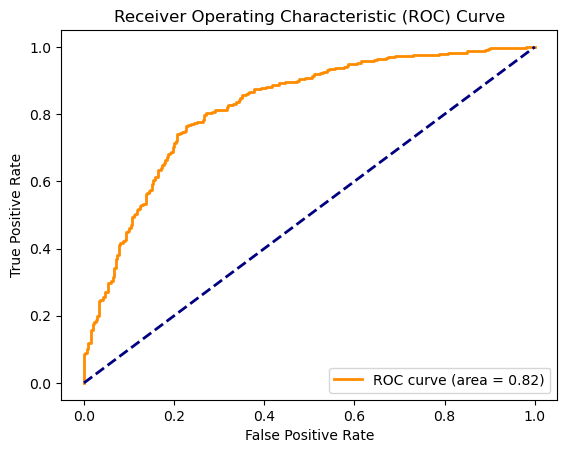

In [548]:
# Step 5: ROC Curve Analysis
# Combine the PSNR values and create labels
psnr_values = np.concatenate((psnr_real, psnr_synthetic))
labels = np.array([0] * len(psnr_real) + [1] * len(psnr_synthetic))  # 0 for real, 1 for synthetic

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(labels, psnr_values)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# Analysis: The ROC curve evaluates the ability of PSNR to distinguish between synthetic and real data.
# Expectation: A higher AUC (close to 1) indicates that the PSNR values effectively differentiate between the two groups, while an AUC close to 0.5 suggests poor discrimination power.


- An AUC of 0.82 suggests that the PSNR metric is effective in distinguishing between Synthetic and Real images, and this effectiveness is well above that of a random classifier.
- The curve’s shape shows that it is possible to achieve a good balance between sensitivity (TPR) and specificity (FPR) with appropriate threshold selection.
- The classifier can effectively capture most of the Synthetic images (high TPR) without misclassifying too many Real images as Synthetic (low FPR).

Optimal Threshold

In [549]:
# Finding the optimal threshold
# Youden's J statistic to maximize (sensitivity + specificity - 1)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold (Youden Index): {optimal_threshold:.2f}')

Optimal Threshold (Youden Index): 21.72


Classification

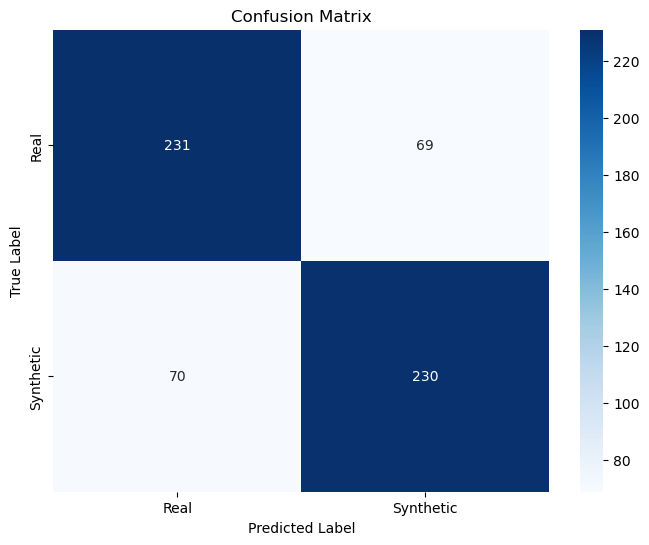

In [550]:
# Classify data based on the optimal threshold
predictions = (psnr_values >= optimal_threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Synthetic'], yticklabels=['Real', 'Synthetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [551]:
# Classification Report
report = classification_report(labels, predictions, target_names=['Real', 'Synthetic'])
print(report)

# Additional Metrics (Accuracy, Precision, Recall, F1 Score)
accuracy = np.sum(predictions == labels) / len(labels)
print(f'Accuracy: {accuracy * 100:.2f} %')

              precision    recall  f1-score   support

        Real       0.77      0.77      0.77       300
   Synthetic       0.77      0.77      0.77       300

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600

Accuracy: 76.83 %


real data, min: 32.530487060546875, max: 5.839631257565455e+37
syn data, min: 0.2347169071435928, max: 0.3803167641162872


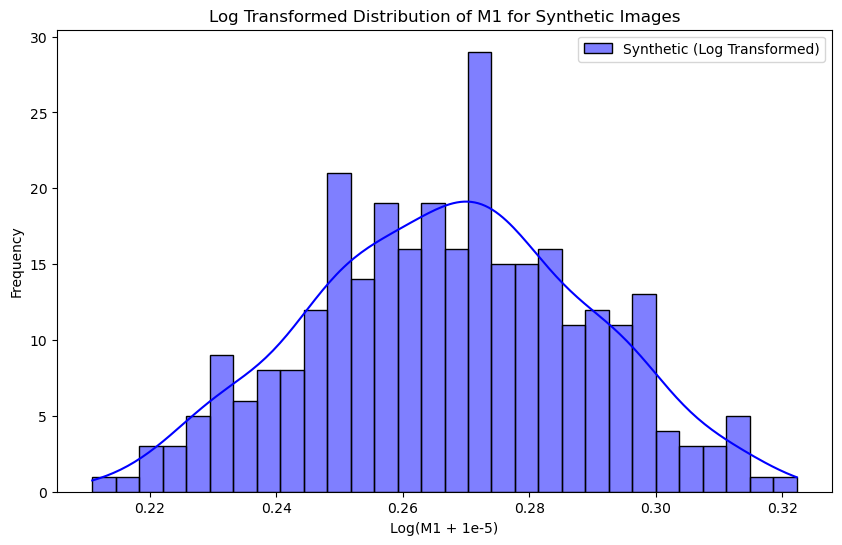

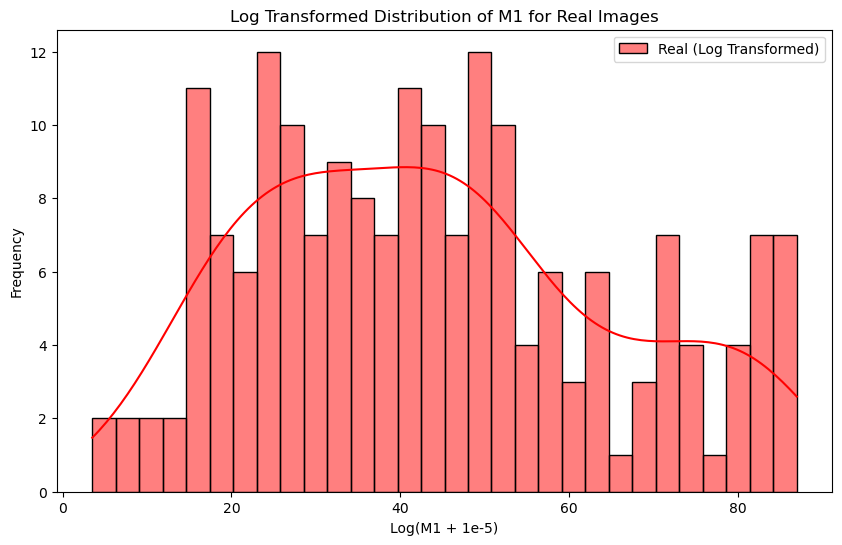

d:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


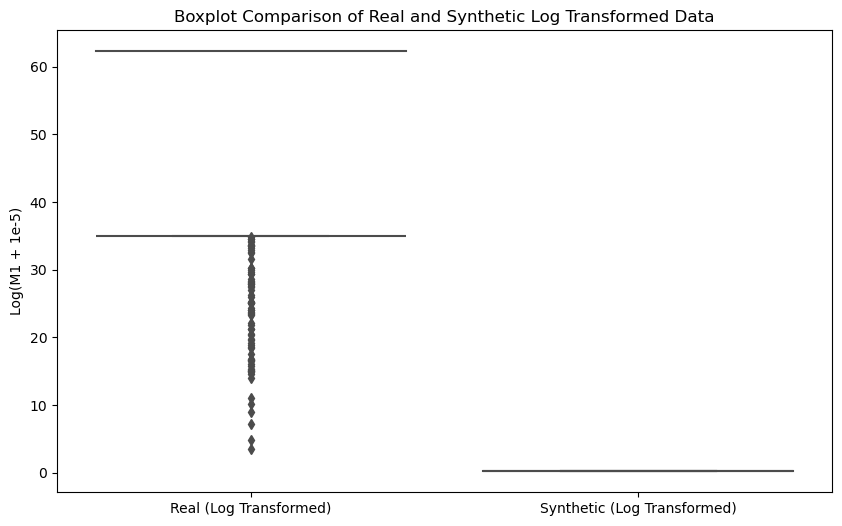

In [566]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is a DataFrame that contains your cosine similarity values
# Replace this with your actual data loading
# data = pd.read_csv('your_data.csv')

# Extract the cosine similarity values for real and synthetic images
M1_real = data['real_method1'].dropna().values  
M1_synthetic = data['syn_method1'].dropna().values  

# Apply log transformation with a small constant
M1_real_log = np.log1p(M1_real + 1e-5)
M1_synthetic_log = np.log1p(M1_synthetic + 1e-5)

print(f"real data, min: {M1_real.min()}, max: {np.max(M1_real[np.isfinite(M1_real)])}")
print(f"syn data, min: {M1_synthetic.min()}, max: {M1_synthetic.max()}")

# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.histplot(M1_synthetic_log, color='blue', label='Synthetic (Log Transformed)', kde=True, bins=30)
plt.xlabel('Log(M1 + 1e-5)')
plt.ylabel('Frequency')
plt.title('Log Transformed Distribution of M1 for Synthetic Images')
plt.legend()
plt.show()

# Plot real data
plt.figure(figsize=(10, 6))
sns.histplot(M1_real_log, color='red', label='Real (Log Transformed)', kde=True, bins=30)
plt.xlabel('Log(M1 + 1e-5)')
plt.ylabel('Frequency')
plt.title('Log Transformed Distribution of M1 for Real Images')
plt.legend()
plt.show()

# Plot Boxplot for better comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=[M1_real_log, M1_synthetic_log], palette=["red", "blue"])
plt.xticks([0, 1], ['Real (Log Transformed)', 'Synthetic (Log Transformed)'])
plt.ylabel('Log(M1 + 1e-5)')
plt.title('Boxplot Comparison of Real and Synthetic Log Transformed Data')
plt.show()
